In [3]:
import numpy as np
import pandas as pd
import math
import re
import seaborn as sns
import matplotlib as plt
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.model_selection import GridSearchCV
import sklearn
ridge = Ridge()
lasso = Lasso()
net   = ElasticNet()
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
train1 = pd.read_csv('./data/train_clean.csv', index_col=0)

In [5]:
#check for NA's
train1[train1.isna().any(axis=1)]

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,TotalBath,Bedroom/Bathroom
Id,,,,,,,,,,,,,,,,,,,,,


In [6]:
#set trainX and trainY 
trainX=train1.drop('SalePrice',axis=1)
trainY=train1['SalePrice']

In [19]:
##Lasso with 20 alphas btw 0.001 and 100. Normalizatio = True, ALL features 
lasso_coefs = []
lasso_intercepts = []
lasso_R2  = []
alphaRange = np.linspace(1e-3,100,20)
for alpha in alphaRange:
    lasso.set_params(alpha=alpha,normalize=True)  
    lasso.fit(trainX,trainY)
    lasso_intercepts.append(lasso.intercept_)
    lasso_coefs.append(lasso.coef_)
    lasso_R2.append(lasso.score(trainX,trainY)) 

In [20]:
#dataframe for a test of 20 alphas with ALL features 
df_lasso_coef=pd.DataFrame(lasso_coefs,index=alphaRange,columns=trainX.columns)
df_lasso_intercept=pd.DataFrame(lasso_intercepts,index=alphaRange,columns=['Intercept'])
df_lasso_R2= pd.DataFrame(lasso_R2,index=alphaRange, columns=['R2'])
df_lasso = pd.concat([df_lasso_R2,df_lasso_intercept,df_lasso_coef], axis=1)
df_lasso

,R2,Intercept,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,TotalBath,Bedroom/Bathroom
0.001000,0.913336,-1.475205e+06,62.573534,0.451334,7640.022964,5614.363305,201.877654,6.949293,23.216533,3106.082646,...,27712.813811,12501.630962,1469.164953,8055.896929,11642.045335,-1585.689963,7169.136392,-2210.113093,6246.654159,5839.672722
5.264105,0.906422,-9.205038e+05,11.795347,0.344901,8724.784900,5047.185336,184.411349,0.000000,21.916323,4427.530922,...,21600.580173,4802.349302,-0.000000,5862.147680,8192.793506,-2880.000616,5054.019212,0.000000,3384.040308,797.377616
10.527211,0.893929,-5.772833e+05,-0.000000,0.305169,9417.119514,4146.839503,133.287295,0.000000,19.532774,5647.033435,...,17894.903591,0.000000,-0.000000,0.000000,1800.380680,-3787.970742,2308.067464,0.000000,3808.471855,0.000000
15.790316,0.881705,-3.720093e+05,-0.000000,0.289618,9903.308020,3639.508401,104.738457,0.000000,17.213346,6330.777006,...,15422.837564,0.000000,-0.000000,0.000000,0.000000,-3697.454859,379.206939,0.000000,4442.976634,-0.000000
21.053421,0.877612,-3.870886e+05,0.000000,0.276658,10168.892164,3266.744006,109.304902,10.761716,15.971816,7339.186955,...,15246.714282,0.000000,-0.000000,0.000000,0.000000,-2743.146144,0.000000,0.000000,4197.033706,-0.000000
26.316526,0.873517,-3.825873e+05,0.000000,0.258212,10377.306432,2929.307143,104.554034,20.449633,14.874130,8093.498979,...,15350.616101,0.000000,-0.000000,0.000000,0.000000,-1409.817976,0.000000,0.000000,4123.842092,-0.000000
31.579632,0.869619,-3.546265e+05,0.000000,0.248279,10576.441760,2591.810298,87.575893,28.161834,13.366408,8666.183180,...,15339.117987,0.000000,-0.000000,0.000000,0.000000,-184.110657,0.000000,0.000000,3995.112616,-0.000000
36.842737,0.866091,-3.230835e+05,0.000000,0.242938,10820.798589,2293.692914,71.986788,31.053574,12.505675,8992.335171,...,15189.398069,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,3924.605550,-0.000000
42.105842,0.862473,-2.924565e+05,0.000000,0.236741,11084.454557,2026.835773,59.459218,31.510659,12.133817,9265.333438,...,14966.433205,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,3878.817513,-0.000000
47.368947,0.858867,-2.696090e+05,0.000000,0.231988,11348.573639,1775.689726,50.890542,30.955849,11.819932,9493.042615,...,14727.176838,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,3835.830171,-0.000000


In [21]:
#LassoCV with 10 folds Lasso with 20 alphas btw 0.001 and 100. Normalizatio = True, ALL features 
from sklearn.linear_model import LassoCV
alpha = np.linspace(1e-3,100,20)
regressor = LassoCV(alphas=list(alpha),max_iter=10000,cv=10, normalize=True, random_state=0)
regressor.fit(trainX, trainY)
lasso_mse = np.mean(regressor.mse_path_, axis=0)
print("Alphas: %s" % alpha)
print("Lasso RMSE on Training set :", lasso_mse)
print("Best Alpha using built-in LassoCV: %f" % regressor.alpha_)
#21.053 is the best Alpha per LassoCV

Alphas: [1.00000000e-03 5.26410526e+00 1.05272105e+01 1.57903158e+01
 2.10534211e+01 2.63165263e+01 3.15796316e+01 3.68427368e+01
 4.21058421e+01 4.73689474e+01 5.26320526e+01 5.78951579e+01
 6.31582632e+01 6.84213684e+01 7.36844737e+01 7.89475789e+01
 8.42106842e+01 8.94737895e+01 9.47368947e+01 1.00000000e+02]
Lasso RMSE on Training set : [7.96094796e+08 9.71178508e+08 6.92258988e+08 1.57743109e+09
 1.36295741e+09 7.89902615e+08 7.57982335e+08 7.83757838e+08
 3.30713021e+09 5.90120884e+08]
Best Alpha using built-in LassoCV: 21.053421


In [22]:
# select features based on LassoCV best alpha of 21.053
a=df_lasso.iloc[4:5,2:]!=0
new_alpha21=list(a[a.columns[(a != 0).any()]].columns)
trainX_alpha21=trainX[new_alpha21]
len(new_alpha21)
## 77 features remaining 

77

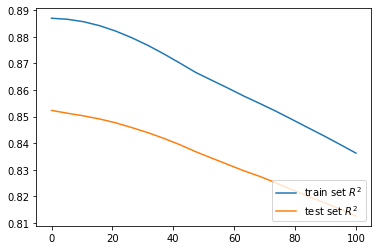

In [23]:
#train/test check 77 features 
X_train, X_test, Y_train, Y_test = train_test_split(trainX_alpha21, trainY, test_size=0.3, random_state=10)
lasso_R2_train  = []
lasso_R2_test = []
alphaRange = np.linspace(1e-3,100,20)
for alpha in alphaRange:
    lasso.set_params(alpha=alpha,normalize=True)  
    lasso.fit(X_train,Y_train)
    lasso_R2_train.append(lasso.score(X_train,Y_train)) 
    lasso_R2_test.append(lasso.score(X_test,Y_test)) 
plt.plot(alphaRange, lasso_R2_train, label=r'train set $R^2$')
plt.plot(alphaRange, lasso_R2_test, label=r'test set $R^2$')
plt.legend(loc=4)

In [24]:
##Lasso with 20 alphas btw 20 and 500. Normalizatio = True, 77 features 
lasso_coefs = []
lasso_intercepts = []
lasso_R2  = []
alphaRange2 = np.linspace(20,500,20)
for alpha in alphaRange2:
    lasso.set_params(alpha=alpha,normalize=True)  
    lasso.fit(trainX_alpha21,trainY)
    lasso_intercepts.append(lasso.intercept_)
    lasso_coefs.append(lasso.coef_)
    lasso_R2.append(lasso.score(trainX_alpha21,trainY))    

In [25]:
#dataframe for a test of 20 alphas 
df_lasso_coef=pd.DataFrame(lasso_coefs,index=alphaRange2,columns=trainX_alpha21.columns)
df_lasso_intercept=pd.DataFrame(lasso_intercepts,index=alphaRange2,columns=['Intercept'])
df_lasso_R2= pd.DataFrame(lasso_R2,index=alphaRange2, columns=['R2'])
df_lasso_v10 = pd.concat([df_lasso_R2,df_lasso_intercept,df_lasso_coef], axis=1)
df_lasso_v10

,R2,Intercept,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,...,BsmtExposure_Mn,BsmtExposure_NoBsmt,BsmtExposure_NoExposure,Heating_OthW,GarageType_BuiltIn,GarageType_No,SaleType_Con,SaleType_New,SaleCondition_Family,TotalBath
20.000000,0.878382,-384873.422076,0.279860,10128.589928,3338.424337,108.805241,8.542267,16.164095,7169.895812,5488.396056,...,-1268.421991,2073.635147,-5690.821891,-25258.697553,227.779616,3914.554738,11451.823416,15214.522537,-3035.748336,4239.418094
45.263158,0.860958,-272452.380849,0.241246,11481.131067,1848.113876,54.319378,29.675856,12.716817,9330.745970,5376.505488,...,-0.000000,0.000000,-4961.990611,-1930.301305,0.000000,0.000000,0.000000,15034.857215,-0.000000,3318.453491
70.526316,0.845249,-171365.183123,0.224072,12757.382078,711.400526,15.304622,25.361193,11.758456,9988.543205,5362.704074,...,-0.000000,0.000000,-4226.032453,-0.000000,0.000000,0.000000,0.000000,13359.410870,-0.000000,2552.190613
95.789474,0.830871,-116854.670714,0.223344,13623.553623,0.000000,0.000000,13.006153,10.092432,10393.655518,5047.580021,...,0.000000,0.000000,-3352.154659,-0.000000,0.000000,0.000000,0.000000,10967.218564,-0.000000,1500.488804
121.052632,0.818952,-91852.537825,0.201030,14235.459072,0.000000,0.000000,0.000000,9.474415,10949.835225,4725.817157,...,0.000000,-0.000000,-2635.869710,-0.000000,0.000000,0.000000,0.000000,8684.934689,-0.000000,897.510056
146.315789,0.808550,-94071.505213,0.161129,14832.858245,0.000000,0.000000,0.000000,9.158342,11291.613940,4350.820765,...,0.000000,-0.000000,-1868.882226,-0.000000,0.000000,-0.000000,0.000000,6266.102217,-0.000000,777.900583
171.578947,0.798243,-94523.084719,0.113812,15303.577280,0.000000,0.000000,0.000000,8.459617,11579.845170,3989.918976,...,0.000000,-0.000000,-1032.021100,-0.000000,0.000000,-0.000000,0.000000,3914.490063,-0.000000,756.584291
196.842105,0.787999,-94057.216961,0.065597,15660.134711,0.000000,0.000000,0.000000,7.753208,11788.205803,3638.478612,...,0.000000,-0.000000,-122.991187,-0.000000,0.000000,-0.000000,0.000000,1482.926633,-0.000000,781.823353
222.105263,0.777120,-92321.155303,0.015680,16000.918788,0.000000,0.000000,0.000000,7.028573,11841.451922,3319.128523,...,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,814.626307
247.368421,0.767214,-89255.437997,0.000000,16373.241881,0.000000,0.000000,0.000000,5.947483,11664.561614,2960.665994,...,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,814.035841


In [26]:
alpha = np.linspace(20,500,20)
regressor = LassoCV(alphas=list(alpha),max_iter=10000,cv=10, normalize=True, random_state=0)
regressor.fit(trainX_alpha21, trainY)
lasso_mse = np.mean(regressor.mse_path_, axis=0)
print("Alphas: %s" % alpha)
print("Lasso RMSE on Training set :", lasso_mse)
print("Best Alpha using built-in LassoCV: %f" % regressor.alpha_)

Alphas: [ 20.          45.26315789  70.52631579  95.78947368 121.05263158
 146.31578947 171.57894737 196.84210526 222.10526316 247.36842105
 272.63157895 297.89473684 323.15789474 348.42105263 373.68421053
 398.94736842 424.21052632 449.47368421 474.73684211 500.        ]
Lasso RMSE on Training set : [8.14073912e+08 1.25368285e+09 1.10125676e+09 1.92898146e+09
 2.42372015e+09 1.36133713e+09 1.16152827e+09 1.11340900e+09
 3.02821222e+09 9.35739939e+08]
Best Alpha using built-in LassoCV: 20.000000


In [27]:
# select features based on LassoCV best alpha of 21.05
a=df_lasso_v10.iloc[1:2,2:]!=0
new_alpha20=list(a[a.columns[(a != 0).any()]].columns)
trainX_alpha20=trainX[new_alpha20]
len(new_alpha20)
## 55 features remaining 

51

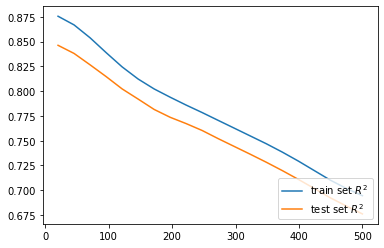

In [28]:
#train/test check for 33 features 
X_train, X_test, Y_train, Y_test = train_test_split(trainX_alpha20, trainY, test_size=0.3, random_state=10)
lasso_R2_train  = []
lasso_R2_test = []
alphaRange2 = np.linspace(20,500,20)
for alpha in alphaRange2:
    lasso.set_params(alpha=alpha,normalize=True)  
    lasso.fit(X_train,Y_train)
    lasso_R2_train.append(lasso.score(X_train,Y_train)) 
    lasso_R2_test.append(lasso.score(X_test,Y_test))
    
plt.plot(alphaRange2, lasso_R2_train, label=r'train set $R^2$')
plt.plot(alphaRange2, lasso_R2_test, label=r'test set $R^2$')
plt.legend(loc=4)

In [29]:
#17 features summarized in MLR notebook
L17=['OverallQual', 'TotalBsmtSF', 'KitchenAbvGr', 'Gar2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 
     'BldgType_Duplex', 'HouseStyle_SLvl', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_ImStucc', 
     'Exterior2nd_Stone', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial', 
     'Bedroom/Bathroom']

In [30]:
trainX_17=trainX[L17]

In [31]:
##Lasso with 20 alphas btw 20 and 500. Normalizatio = True, 17 features 
lasso_coefs = []
lasso_intercepts = []
lasso_R2  = []
alphaRange2 = np.linspace(20,500,20)
for alpha in alphaRange2:
    lasso.set_params(alpha=alpha,normalize=True)  
    lasso.fit(trainX_17,trainY)
    lasso_intercepts.append(lasso.intercept_)
    lasso_coefs.append(lasso.coef_)
    lasso_R2.append(lasso.score(trainX_17,trainY))

In [32]:
#dataframe for a test of 20 alphas 17 features 
df_lasso_coef=pd.DataFrame(lasso_coefs,index=alphaRange2,columns=trainX_17.columns)
df_lasso_intercept=pd.DataFrame(lasso_intercepts,index=alphaRange2,columns=['Intercept'])
df_lasso_R2= pd.DataFrame(lasso_R2,index=alphaRange2, columns=['R2'])
df_lasso_17 = pd.concat([df_lasso_R2,df_lasso_intercept,df_lasso_coef], axis=1)
df_lasso_17

,R2,Intercept,OverallQual,TotalBsmtSF,KitchenAbvGr,Gar2,LotShape_IR3,LotShape_Reg,LandContour_HLS,BldgType_Duplex,HouseStyle_SLvl,Exterior1st_ImStucc,Exterior1st_Stone,Exterior2nd_ImStucc,Exterior2nd_Stone,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Bedroom/Bathroom
20.000000,0.700421,-46870.776117,33065.042340,42.733467,0.0,-0.0,-20135.716028,-13690.343197,7585.840645,-0.0,-0.0,-2846.765258,0.0,25671.863371,25022.568975,-8451.470183,1699.998477,23256.390394,-10276.632968
45.263158,0.697228,-45200.440485,33059.462557,41.256711,0.0,-0.0,-6557.655866,-12212.099919,3010.366489,-0.0,-0.0,-0.000000,0.0,13225.875065,5120.241292,-2128.506050,0.000000,19305.084575,-9666.912865
70.526316,0.693822,-45471.802786,33011.591631,40.183024,0.0,-0.0,-0.000000,-10716.726308,0.000000,-0.0,-0.0,-0.000000,0.0,1753.408439,0.000000,-0.000000,0.000000,16815.234964,-8874.886451
95.789474,0.691121,-45788.964403,32907.394947,39.269446,-0.0,-0.0,-0.000000,-9179.028852,0.000000,-0.0,-0.0,-0.000000,0.0,0.000000,0.000000,-0.000000,-0.000000,14316.850540,-8021.614916
121.052632,0.687759,-46087.240975,32800.689759,38.336181,-0.0,-0.0,-0.000000,-7644.526098,0.000000,-0.0,-0.0,-0.000000,0.0,0.000000,0.000000,-0.000000,-0.000000,11844.878700,-7164.746059
146.315789,0.683614,-46385.517547,32693.984571,37.402915,-0.0,-0.0,-0.000000,-6110.023345,0.000000,-0.0,-0.0,-0.000000,0.0,0.000000,0.000000,-0.000000,-0.000000,9372.906860,-6307.877201
171.578947,0.678686,-46683.794119,32587.279383,36.469650,-0.0,-0.0,-0.000000,-4575.520592,0.000000,-0.0,-0.0,-0.000000,0.0,0.000000,0.000000,-0.000000,-0.000000,6900.935020,-5451.008344
196.842105,0.672976,-46984.619688,32480.942243,35.536337,-0.0,-0.0,-0.000000,-3041.011116,0.000000,-0.0,-0.0,-0.000000,0.0,0.000000,0.000000,-0.000000,-0.000000,4428.711079,-4593.866303
222.105263,0.666480,-47284.429422,32374.691811,34.601641,-0.0,-0.0,-0.000000,-1505.675644,0.000000,-0.0,-0.0,-0.000000,0.0,0.000000,0.000000,-0.000000,-0.000000,1955.066482,-3737.080553
247.368421,0.659489,-47417.111298,32242.542520,33.623458,-0.0,-0.0,-0.000000,-0.000000,0.000000,-0.0,-0.0,-0.000000,0.0,0.000000,0.000000,-0.000000,-0.000000,0.000000,-2871.663178


In [16]:
from sklearn.linear_model import LassoCV
alpha = np.linspace(20,500,20)
regressor = LassoCV(alphas=list(alpha),max_iter=10000,cv=10, normalize=True, random_state=0)
regressor.fit(trainX_17, trainY)
lasso_mse = np.mean(regressor.mse_path_, axis=0)
print("Alphas: %s" % alpha)
print("Lasso RMSE on Training set :", lasso_mse)
print("Best Alpha using built-in LassoCV: %f" % regressor.alpha_)

Alphas: [ 20.          45.26315789  70.52631579  95.78947368 121.05263158
 146.31578947 171.57894737 196.84210526 222.10526316 247.36842105
 272.63157895 297.89473684 323.15789474 348.42105263 373.68421053
 398.94736842 424.21052632 449.47368421 474.73684211 500.        ]
Lasso RMSE on Training set : [1.35604709e+09 2.03434733e+09 1.88495546e+09 2.20976140e+09
 3.41254069e+09 2.36290079e+09 1.57468905e+09 1.74535104e+09
 3.66240071e+09 1.55395406e+09]
Best Alpha using built-in LassoCV: 45.263158


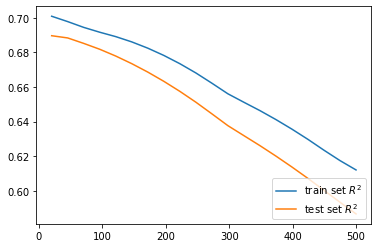

In [37]:
#train/test check for 33 features 
X_train, X_test, Y_train, Y_test = train_test_split(trainX_17, trainY, test_size=0.3, random_state=10)
lasso_R2_train  = []
lasso_R2_test = []
alphaRange2 = np.linspace(20,500,20)
for alpha in alphaRange2:
    lasso.set_params(alpha=alpha,normalize=True)  
    lasso.fit(X_train,Y_train)
    lasso_R2_train.append(lasso.score(X_train,Y_train)) 
    lasso_R2_test.append(lasso.score(X_test,Y_test))
    
plt.plot(alphaRange2, lasso_R2_train, label=r'train set $R^2$')
plt.plot(alphaRange2, lasso_R2_test, label=r'test set $R^2$')
plt.legend(loc=4)

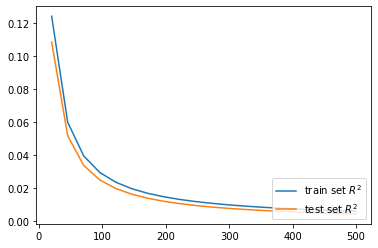

In [35]:
ridge_R2_train  = []
ridge_R2_test = []
alphaRange2 = np.linspace(20,500,20)
for alpha in alphaRange2:
    ridge.set_params(alpha=alpha,normalize=True)  
    ridge.fit(X_train,Y_train)
    ridge_R2_train.append(ridge.score(X_train,Y_train)) 
    ridge_R2_test.append(ridge.score(X_test,Y_test))
    
plt.plot(alphaRange2, ridge_R2_train, label=r'train set $R^2$')
plt.plot(alphaRange2, ridge_R2_test, label=r'test set $R^2$')
plt.legend(loc=4)

In [ ]:
##Ridge with 20 alphas btw 0.001 and 100. Normalizatio = True 
ridge_coefs = []
ridge_intercepts = []
ridge_R2  = []
MSE = []
alphaRange = np.linspace(1e-3,100,20)
for alpha in alphaRange:
    ridge.set_params(alpha=alpha,normalize=True)  
    ridge.fit(trainX,trainY)
    ridge_intercepts.append(ridge.intercept_)
    ridge_coefs.append(ridge.coef_)
    ridge_R2.append(ridge.score(trainX,trainY))   

In [135]:
df_ridge 
#R^2 dropped below 0.5 after the 4th alpha 

,R2,Intercept,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,TotalBath,Bedroom/Bathroom
0.001000,0.913082,-1.283908e+06,49.083747,0.448824,7771.608100,5491.949726,192.833430,7.681357,22.993693,3157.620581,...,25772.260417,12104.828360,1349.869918,8670.012440,11858.814987,-1675.695866,7135.323108,-631.610683,6386.564476,5667.649882
5.264105,0.744982,-1.899022e+05,61.068412,0.140618,2772.845244,341.831940,50.416801,91.288990,12.687806,5237.036186,...,4987.894025,-2126.503802,-2520.388121,-1912.259402,661.866653,-2921.655128,-984.090333,4779.514393,2833.511680,-2099.372804
10.527211,0.642332,-9.131118e+04,47.886976,0.101460,2019.773564,63.517437,44.647941,73.606720,9.329812,3968.331697,...,3968.020255,-1991.935437,-2084.054721,-2074.188742,11.113790,-1862.936372,-983.364474,3828.894685,2187.700821,-1765.794893
15.790316,0.561739,-3.945468e+04,39.078409,0.080103,1614.537614,-15.656292,38.910257,61.506475,7.469181,3222.966038,...,3297.384438,-1749.337265,-1755.903087,-1924.165841,-150.082853,-1388.437389,-877.314817,3190.309278,1787.922822,-1498.577251
21.053421,0.497842,-5.493573e+03,32.980130,0.066373,1351.108961,-44.813505,34.197096,52.788451,6.251572,2720.969669,...,2820.627587,-1538.732582,-1512.674502,-1743.748999,-201.083934,-1113.435479,-776.776008,2732.903213,1513.727059,-1296.531233
26.316526,0.446382,1.897085e+04,28.527050,0.056737,1163.806369,-56.289312,30.403035,46.222338,5.384128,2357.027711,...,2464.225497,-1367.114649,-1327.216351,-1578.883488,-215.489158,-932.066621,-692.532341,2389.678825,1313.265781,-1140.838576
31.579632,0.404243,3.758585e+04,25.135136,0.049579,1023.059685,-60.380255,27.324040,41.103247,4.731936,2080.148500,...,2187.730178,-1227.455920,-1181.690127,-1436.338058,-215.628743,-802.742984,-623.086386,2122.811783,1160.065765,-1017.845991
36.842737,0.369192,5.228094e+04,22.465679,0.044042,913.144305,-61.092453,24.790367,37.002045,4.222587,1862.065732,...,1966.991322,-1112.534613,-1064.651480,-1314.501734,-209.864748,-705.561149,-565.528912,1909.446013,1039.068111,-918.465313
42.105842,0.339627,6.419964e+04,20.309931,0.039628,824.802814,-60.190329,22.675401,33.643383,3.813271,1685.686239,...,1786.696159,-1016.693595,-968.564965,-1210.199558,-201.726977,-629.714081,-517.311932,1734.991760,941.034484,-836.592128
47.368947,0.314378,7.407171e+04,18.532464,0.036023,752.188794,-58.517530,20.886404,30.842744,3.476898,1540.011621,...,1636.666674,-935.720587,-888.306138,-1120.371017,-192.813275,-568.794206,-476.451756,1589.710486,859.968056,-768.022090


In [ ]:
##Ridge with 20 alphas btw 20 and 500. Normalizatio = True, with 77 featyres 
ridge_coefs = []
ridge_intercepts = []
ridge_R2  = []
MSE = []
alphaRange2 = np.linspace(20,500,20)
for alpha in alphaRange2:
    ridge.set_params(alpha=alpha,normalize=True)  
    ridge.fit(trainX_alpha21,trainY)
    ridge_intercepts.append(ridge.intercept_)
    ridge_coefs.append(ridge.coef_)
    ridge_R2.append(ridge.score(trainX_alpha21,trainY)) 

In [47]:
##select features at 13th alpha
a=df_lasso.iloc[12:13,:]!=0
a[a.columns[(a != 0).any()]].columns

Index(['R2', 'Intercept', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtFinType1',
       'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', 'GrLivArea',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'ScreenPorch', 'MSZoning_RM', 'LotConfig_CulDSac',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_StoneBr',
       'Condition1_Feedr', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'RoofStyle_Hip', 'RoofMatl_WdShngl', 'Exterior1st_BrkFace',
       'Exterior2nd_Stucco', 'BsmtExposure_Gd', 'BsmtExposure_NoExposure',
       'SaleType_New', 'TotalBath'],
      dtype='object')


continuous and ordinal 
- some features dropped to zero with relatively small penalization
1. LotFrontage 
2. YearReModAdd - interesting it dropped to zero then back 
3. ExterCond - could be correlated to ExterQual 
4. BsmtCond - could be correlated to BsmtQual 
5. BsmtFinSF2 - could be correleated to Bsmt features
6. BsmtUnfSF - could be correlated to other Bsmt features 
7. BedrooAbvG - zero after 7 alphas 
8. GarageYrBlt - could be correlated to YrHouseBuilt 
9. GarageQual - could be correlated to OverallQual or other Garage features 
10. GarageCond - could be correlated to GarageQual or OverallQual
11. PavedDrive - could be related to OverallQual 
12. OpenPorchSF - maybe we should remove 
13. EnclosedPorchSF - maybe we should remove 
14. 3SsnPorch - zero at 6th alpha
15. PoolArea - maybe w should remove 
16. PoolQC - 
18. Fence
19. MoSold - 
20. YrSold - 
21. Gar2  (misc feature) - maybe we should remove
22. Shed (misc feature) - maybe we should remove 
23. TenC (misc feature tennis court) - maybe we should remoe 

- coefs decreased  to zero then above zero 
1. TotalBsmtSF
2. 1stFlrSf
3. ExterQual
4. TotalBsmtSF 



- coefs that increased then decreased 
1. BsmtFinType1

- coefs with increasing coefs 
1. OverallQual
2. ExterQual 
3. KitchenQual 
4.  GarageCars

- features that seem to be important
1. LotArea
2. OverallQual
3. OverallCond
4. YearBuilt
5. YearRemodAdd
6. MasVnrArea
7. ExterQual
8. BsmtQual
9. BsmtFinType1
10. BsmtFinTypeSF - maybe we should add together the SF?
11. HeatingQC
12. GrLivArea
13. KitchenAbvGr
14. KitchenQual
15. GarageFinish
16. GarageCars
17. WooddeckSF
18. TotalBaths



#CATEGORICAL 
1. MS_Zoning - seems like RM (residential medium density has the most weight on coefs)

2. Alley ( no vs paved)
3. LotShape
   - reg goes to zero quickly
4. LotConfig 
   -FR2, FR3, Inside go down to zero quickly 
5. Landslope - call go down to zero quickly 
6. Neighborhood 
  - BrDale, ClearCr, CollgCr, Gilbert, IDOTRR, MeadowV, NAmes, NPkVills, SWISU, Sawyer, Timber go down quickly 
7. condition 
  -PoSA, RRan, RRNe, RRNn go down quickly 
8. Bldgtype 
   - 2fmCon goes down to zero quicly 
9. HouseStyle
   0 2.5Unf, SFoyer, Slvl go down quickly 
10. RoofStyle
   - Gambrel,Mansard,Shed
   - Hip goes than to zero than back up 
11. RoofMatl  
   - Metal,Roll,Tar&Grv,WdShake go down quickly 
    - WdShngl seem to matter E
12. Exterior 1
    -only CemntBd,HdBoard, ImStuc, and Wd Sdng did NOT go down to zero quickly 
13. Exterior 2 
    - only _ImStucc, Stucco,Wd Shng did NOT go down to zero quickly 
     - VinylSd went to zero then back up 
14. MasVnrType
   - Seems like BrkFace is the only that did not go down to zero quicly 
15. Foundation - does not like seem any of the dummified features are important 
16. BsmtExposure
    -  only Gd and NoExposure seem to matter 
17. BsmtFinType2 - does not seem to matter 
18. Heating - only OthW seems to matter 
19. Electrical - does not seem to matter 
20. Central Air - does not seem to matter 
21. GarageType 
    -Builin went down to zero than back up 
22. SaleType 
   - only New Type seems to matter 
23. Sale Condition
    - only Family seem to matter 

In [120]:
#count of zero coefs per alpha 
df_lasso[df_lasso == 0].count(axis=1)

0.001000        0
5.264105       53
10.527211      84
15.790316     107
21.053421     123
26.316526     130
31.579632     134
36.842737     143
42.105842     145
47.368947     150
52.632053     152
57.895158     152
63.158263     156
68.421368     158
73.684474     162
78.947579     165
84.210684     165
89.473789     165
94.736895     167
100.000000    167
dtype: int64

In [145]:
from sklearn.linear_model import RidgeCV
alpha = np.linspace(1e-3,100,20)
regressor = RidgeCV(alphas=list(alpha),store_cv_values=True,normalize=True)
regressor.fit(trainX, trainY)
cv_mse = np.mean(regressor.cv_values_, axis=0)

print("Alphas: %s" % alpha)
print("Ridge RMSE on Training set :", cv_mse)
print("Best Alpha using built-in RidgeCV: %f" % regressor.alpha_)
#this is the second alpha

Alphas: [1.00000000e-03 5.26410526e+00 1.05272105e+01 1.57903158e+01
 2.10534211e+01 2.63165263e+01 3.15796316e+01 3.68427368e+01
 4.21058421e+01 4.73689474e+01 5.26320526e+01 5.78951579e+01
 6.31582632e+01 6.84213684e+01 7.36844737e+01 7.89475789e+01
 8.42106842e+01 8.94737895e+01 9.47368947e+01 1.00000000e+02]
Ridge RMSE on Training set : [1.91624139e+09 1.71344485e+09 2.32840327e+09 2.82155408e+09
 3.21474806e+09 3.53210148e+09 3.79224926e+09 4.00875372e+09
 4.19143321e+09 4.34747024e+09 4.48219961e+09 4.59964815e+09
 4.70290340e+09 4.79436769e+09 4.87593561e+09 4.94911993e+09
 5.01514231e+09 5.07499950e+09 5.12951255e+09 5.17936359e+09]
Best Alpha using built-in RidgeCV: 5.264105


In [164]:
# select features based on LassoCV best alpha of 21.05
a=df_lasso.iloc[4:5,2:]!=0
new_alpha21=list(a[a.columns[(a != 0).any()]].columns)
trainX_alpha21=trainX[new_alpha21]
len(new_alpha21)

77

In [88]:
#LassoCV with 10 folds and with alphas between 1e-3 to 30 and reduced features (77) 
from sklearn.linear_model import LassoCV
alpha = np.linspace(1e-3,100,20)
regressor = LassoCV(alphas=list(alpha),max_iter=10000,cv=10, normalize=True, random_state=0)
regressor.fit(trainX_alpha21, trainY)
lasso_mse = np.mean(regressor.mse_path_, axis=0)
print("Alphas: %s" % alpha)
print("Lasso RMSE on Training set :", lasso_mse)
print("Best Alpha using built-in LassoCV: %f" % regressor.alpha_)

Alphas: [1.00000000e-03 5.26410526e+00 1.05272105e+01 1.57903158e+01
 2.10534211e+01 2.63165263e+01 3.15796316e+01 3.68427368e+01
 4.21058421e+01 4.73689474e+01 5.26320526e+01 5.78951579e+01
 6.31582632e+01 6.84213684e+01 7.36844737e+01 7.89475789e+01
 8.42106842e+01 8.94737895e+01 9.47368947e+01 1.00000000e+02]
Lasso RMSE on Training set : [5.26957957e+08 6.03447715e+08 6.92442772e+08 1.54795280e+09
 1.35463769e+09 7.76011495e+08 7.60619901e+08 7.72495354e+08
 2.85675997e+09 5.88664049e+08]
Best Alpha using built-in LassoCV: 5.264105


In [90]:
##Lasso with 20 alphas btw 0.001 and 100. Normalizatio = True, with 77 features 
lasso_coefs = []
lasso_intercepts = []
lasso_R2  = []
alphaRange = np.linspace(1e-3,100,20)
for alpha in alphaRange:
    lasso.set_params(alpha=alpha,normalize=True)  
    lasso.fit(trainX_alpha21,trainY)
    lasso_intercepts.append(lasso.intercept_)
    lasso_coefs.append(lasso.coef_)
    lasso_R2.append(lasso.score(trainX_alpha21,trainY))    

In [91]:
#dataframe for a test of 20 alphas, with 77 features 
df_lasso_coef=pd.DataFrame(lasso_coefs,index=alphaRange,columns=trainX_alpha21.columns)
df_lasso_intercept=pd.DataFrame(lasso_intercepts,index=alphaRange,columns=['Intercept'])
df_lasso_R2= pd.DataFrame(lasso_R2,index=alphaRange, columns=['R2'])
df_lasso_v2 = pd.concat([df_lasso_R2,df_lasso_intercept,df_lasso_coef], axis=1)
df_lasso_v2

,R2,Intercept,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,...,BsmtExposure_Mn,BsmtExposure_NoBsmt,BsmtExposure_NoExposure,Heating_OthW,GarageType_BuiltIn,GarageType_No,SaleType_Con,SaleType_New,SaleCondition_Family,TotalBath
0.001000,0.885520,-337304.433797,0.339718,9291.262434,4711.207818,97.479817,-34.818154,19.783041,3971.701203,7503.809078,...,-7321.622851,14020.683335,-7144.377414,-51597.348172,3206.566388,13012.984075,26989.934826,14582.993567,-8574.763437,4996.580682
5.264105,0.884993,-378667.806402,0.324894,9507.426250,4224.375477,92.589140,0.000000,18.975144,4781.482393,6903.427354,...,-5675.594064,10725.079385,-6741.608408,-44842.455817,2428.691380,10298.008294,22666.068022,14666.114296,-7115.037694,4730.442384
10.527211,0.883521,-376777.265216,0.308738,9732.251182,3924.125761,99.245339,0.000000,17.952013,5636.167636,6403.715496,...,-4107.525274,7647.655682,-6368.528186,-37822.646945,1642.665297,8051.465191,18680.333699,14872.077326,-5657.318719,4565.232950
15.790316,0.881068,-374925.415185,0.292542,9953.235795,3624.608469,105.914051,0.000000,16.929647,6492.715325,5907.396861,...,-2538.196330,4580.312440,-5994.235357,-30799.667728,854.727385,5808.487074,14697.627783,15076.273440,-4199.040461,4397.011576
21.053421,0.877610,-387407.343027,0.276719,10173.730422,3265.930430,109.408448,10.836821,15.973504,7337.801776,5381.140123,...,-949.834359,1441.037052,-5614.565043,-23871.768091,71.354009,3434.121820,10632.304038,15248.229424,-2744.161524,4200.258369
26.316526,0.873621,-383354.374320,0.260553,10424.864409,2912.447579,104.334540,21.243959,14.850645,8084.346335,5195.601376,...,-0.000000,0.000000,-5356.573835,-17552.350901,0.000000,1000.395821,6897.511312,15405.091725,-1344.691509,3997.656152
31.579632,0.869920,-355581.381140,0.251907,10679.536232,2567.362555,88.543493,28.301290,13.528104,8641.283361,5311.413362,...,-0.000000,0.000000,-5348.941836,-12947.441959,0.000000,0.000000,3509.663672,15461.568044,-84.111879,3745.155274
36.842737,0.866669,-321841.107454,0.247905,10975.516241,2279.379248,74.086660,29.211067,13.026379,8932.754640,5361.507331,...,-0.000000,0.000000,-5209.677208,-8674.692277,0.000000,0.000000,0.000000,15322.684938,-0.000000,3568.293402
42.105842,0.863201,-289877.242123,0.243669,11295.014935,2006.618174,61.115499,29.586491,12.814033,9188.356452,5371.805666,...,-0.000000,0.000000,-5055.202333,-4467.572990,0.000000,0.000000,0.000000,15149.885239,-0.000000,3412.818053
47.368947,0.859539,-264537.812054,0.239839,11599.836592,1744.221801,51.620550,29.704939,12.681855,9397.913530,5374.245574,...,-0.000000,0.000000,-4892.404770,-200.920511,0.000000,0.000000,0.000000,14959.548775,-0.000000,3260.005298


In [141]:
#select features with the new best alpha for 5, reduced down to 75. 
a=df_lasso_v2.iloc[1:2,2:]!=0
new_alpha5=list(a[a.columns[(a != 0).any()]].columns)
trainX_alpha5=trainX[new_alpha5]
len(new_alpha5)

75

In [206]:
# select features that do not have a zero after 12 alpahs, as at alpha 62
a=df_lasso.iloc[12:13,2:]!=0
new_v1=list(a[a.columns[(a != 0).any()]].columns)
len(new_v1)
trainX_v1=trainX[new_v1]

44

In [221]:
#Try Lasso again with reduced features 
alpha = np.linspace(1e-3,100,20)
regressor = LassoCV(alphas=list(alpha),max_iter=10000,cv=10, normalize=True, random_state=0)
regressor.fit(trainX_v1, trainY)
lasso_mse = np.mean(regressor.mse_path_, axis=0)
print("Alphas: %s" % alpha)
print("Lasso RMSE on Training set :", lasso_mse)
print("Best Alpha using built-in LassoCV: %f" % regressor.alpha_)
print(new_v1)

Alphas: [1.00000000e-03 5.26410526e+00 1.05272105e+01 1.57903158e+01
 2.10534211e+01 2.63165263e+01 3.15796316e+01 3.68427368e+01
 4.21058421e+01 4.73689474e+01 5.26320526e+01 5.78951579e+01
 6.31582632e+01 6.84213684e+01 7.36844737e+01 7.89475789e+01
 8.42106842e+01 8.94737895e+01 9.47368947e+01 1.00000000e+02]
Lasso RMSE on Training set : [5.30238757e+08 6.15894452e+08 6.72057016e+08 1.50227253e+09
 1.39010390e+09 7.94636018e+08 7.70701028e+08 7.72598100e+08
 3.17863908e+09 5.81141164e+08]
Best Alpha using built-in LassoCV: 5.264105
['LotArea', 'OverallQual', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtFinType1', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'KitchenAbvGr', 'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'MSZoning_RM', 'LotConfig_CulDSac', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'RoofStyle_Hip', 'Ro

In [165]:
# select features based on the largest alpha
a=df_lasso.iloc[19:,2:]!=0
new_v2=list(a[a.columns[(a != 0).any()]].columns)
trainX_v2=trainX[new_v2]
print(len(new_v2))

33


In [184]:
#Try Lasso again with only 33 features from new_v2. best alpha at 5
alpha = np.linspace(1e-3,100,20)
regressor = LassoCV(alphas=list(alpha),max_iter=10000,cv=10, normalize=True, random_state=0)
regressor.fit(trainX_v2, trainY)
lasso_mse = np.mean(regressor.mse_path_, axis=0)
print("Alphas: %s" % alpha)
print("Lasso RMSE on Training set :", lasso_mse)
print("Best Alpha using built-in LassoCV: %f" % regressor.alpha_)
print(new_v2)

Alphas: [1.00000000e-03 5.26410526e+00 1.05272105e+01 1.57903158e+01
 2.10534211e+01 2.63165263e+01 3.15796316e+01 3.68427368e+01
 4.21058421e+01 4.73689474e+01 5.26320526e+01 5.78951579e+01
 6.31582632e+01 6.84213684e+01 7.36844737e+01 7.89475789e+01
 8.42106842e+01 8.94737895e+01 9.47368947e+01 1.00000000e+02]
Lasso RMSE on Training set : [5.46316917e+08 6.36127230e+08 6.96075259e+08 1.53779758e+09
 1.41180833e+09 8.21099015e+08 7.79996380e+08 7.86233244e+08
 3.20752764e+09 5.91891648e+08]
Best Alpha using built-in LassoCV: 5.264105
['LotArea', 'OverallQual', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtFinType1', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'KitchenAbvGr', 'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'MSZoning_RM', 'LotConfig_CulDSac', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'RoofStyle_Hip', 'Ro

In [223]:
import statsmodels.api as sm
x = sm.add_constant(trainX_v2)
model = sm.OLS(trainY, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     257.4
Date:                Sun, 10 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:13:26   Log-Likelihood:                -17028.
No. Observations:                1452   AIC:                         3.412e+04
Df Residuals:                    1418   BIC:                         3.430e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -3

In [33]:
import pandas as pd
from sklearn.linear_model import LinearRegression

def sklearn_vif(exogs, data):

    # initialize dictionaries
    vif_dict, tolerance_dict = {}, {}

    # form input data for each exogenous variable
    for exog in exogs:
        not_exog = [i for i in exogs if i != exog]
        X, y = data[not_exog], data[exog]

        # extract r-squared from the fit
        r_squared = LinearRegression().fit(X, y).score(X, y)

        # calculate VIF
        vif = 1/(1 - r_squared)
        vif_dict[exog] = vif

        # calculate tolerance
        tolerance = 1 - r_squared
        tolerance_dict[exog] = tolerance

    # return VIF DataFrame
    df_vif = pd.DataFrame({'VIF': vif_dict, 'Tolerance': tolerance_dict})

    return df_vif

In [176]:
exogs=list(trainX.columns)
data=trainX
VIF=sklearn_vif(exogs=exogs,data=data)
VIF[VIF['VIF']<5]

/Users/zhuwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars
/Users/zhuwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars
/Users/zhuwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars
/Users/zhuwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars
/Users/zhuwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars
/Users/zhuwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars
/Users/zhuwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars
/Users/zhuwang/anaco

,VIF,Tolerance
3SsnPorch,1.188742,0.841225
Alley_No,2.795801,0.357679
Alley_Pave,2.673083,0.374100
BldgType_2fmCon,1.949098,0.513058
BldgType_Duplex,3.852562,0.259568
BldgType_Twnhs,2.552907,0.391710
BldgType_TwnhsE,3.074689,0.325236
BsmtCond,4.966609,0.201345
BsmtExposure_Gd,2.035528,0.491273
BsmtExposure_Mn,1.788693,0.559067


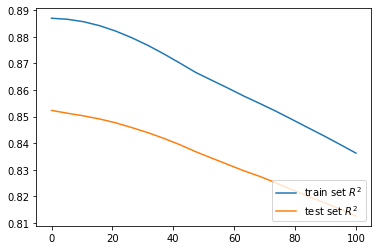

In [166]:
#train/test check 75 features 
X_train, X_test, Y_train, Y_test = train_test_split(trainX_alpha21, trainY, test_size=0.3, random_state=10)
lasso_R2_train  = []
lasso_R2_test = []
alphaRange = np.linspace(1e-3,100,20)
for alpha in alphaRange:
    lasso.set_params(alpha=alpha,normalize=True)  
    lasso.fit(X_train,Y_train)
    lasso_R2_train.append(lasso.score(X_train,Y_train)) 
    lasso_R2_test.append(lasso.score(X_test,Y_test)) 
plt.plot(alphaRange, lasso_R2_train, label=r'train set $R^2$')
plt.plot(alphaRange, lasso_R2_test, label=r'test set $R^2$')
plt.legend(loc=4)

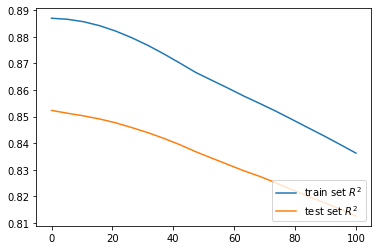

In [167]:
#train/test check for 33 features 
X_train, X_test, Y_train, Y_test = train_test_split(trainX_v1, trainY, test_size=0.3, random_state=10)
lasso_R2_train  = []
lasso_R2_test = []
alphaRange = np.linspace(1e-3,100,20)
for alpha in alphaRange:
    lasso.set_params(alpha=alpha,normalize=True)  
    lasso.fit(X_train,Y_train)
    lasso_R2_train.append(lasso.score(X_train,Y_train)) 
    lasso_R2_test.append(lasso.score(X_test,Y_test))
    
plt.plot(alphaRange, lasso_R2_train, label=r'train set $R^2$')
plt.plot(alphaRange, lasso_R2_test, label=r'test set $R^2$')
plt.legend(loc=4)

In [168]:
##Lasso with 20 alphas btw 100 and 1000. Normalizatio = True 
lasso_coefs = []
lasso_intercepts = []
lasso_R2  = []
alphaRange2 = np.linspace(20,500,20)
for alpha in alphaRange2:
    lasso.set_params(alpha=alpha,normalize=True)  
    lasso.fit(trainX,trainY)
    lasso_intercepts.append(lasso.intercept_)
    lasso_coefs.append(lasso.coef_)
    lasso_R2.append(lasso.score(trainX,trainY)) 

In [169]:
#dataframe for a test of 20 alphas 
df_lasso_coef=pd.DataFrame(lasso_coefs,index=alphaRange2,columns=trainX.columns)
df_lasso_intercept=pd.DataFrame(lasso_intercepts,index=alphaRange2,columns=['Intercept'])
df_lasso_R2= pd.DataFrame(lasso_R2,index=alphaRange2, columns=['R2'])
df_lasso_v3 = pd.concat([df_lasso_R2,df_lasso_intercept,df_lasso_coef], axis=1)
df_lasso_v3

,R2,Intercept,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,TotalBath,Bedroom/Bathroom
20.000000,0.878394,-383823.594292,-0.0,0.279594,10122.843280,3345.104461,108.635584,8.215745,16.185885,7166.344977,...,15214.868318,0.0,-0.0,0.0,0.0,-3031.883885,0.0,0.0,4233.473690,-0.0
45.263158,0.860231,-276816.874643,0.0,0.233546,11242.111339,1875.520043,53.513670,31.242862,11.943349,9413.000416,...,14822.406590,0.0,-0.0,-0.0,0.0,-0.000000,0.0,0.0,3852.370316,-0.0
70.526316,0.844021,-167860.098573,0.0,0.211444,12432.461690,783.199650,10.686703,26.538943,10.691225,10000.241273,...,12935.978823,0.0,-0.0,-0.0,0.0,-0.000000,0.0,0.0,3756.464563,-0.0
95.789474,0.830428,-119400.292476,0.0,0.201192,13325.669249,0.000000,0.000000,11.946291,9.167544,10039.559782,...,10137.962145,0.0,-0.0,-0.0,0.0,-0.000000,-0.0,0.0,3333.366294,-0.0
121.052632,0.818932,-98585.544577,0.0,0.169436,13976.578774,0.000000,0.000000,0.000000,8.770495,10257.445291,...,7334.260477,0.0,-0.0,-0.0,-0.0,-0.000000,-0.0,0.0,3418.948442,-0.0
146.315789,0.808773,-99871.854268,0.0,0.122453,14515.277704,0.000000,0.000000,0.000000,7.919244,10527.730849,...,4814.823304,0.0,-0.0,-0.0,-0.0,-0.000000,-0.0,0.0,3628.569327,-0.0
171.578947,0.798706,-100128.954384,0.0,0.070299,14927.540845,0.000000,0.000000,0.000000,7.089718,10743.956496,...,2341.829458,0.0,-0.0,-0.0,-0.0,-0.000000,-0.0,0.0,3838.981739,-0.0
196.842105,0.788709,-98825.232443,0.0,0.014628,15250.980141,0.000000,0.000000,0.000000,6.283559,10841.225530,...,0.000000,0.0,-0.0,-0.0,-0.0,-0.000000,-0.0,0.0,3983.794044,-0.0
222.105263,0.779691,-95296.550136,0.0,0.000000,15635.969713,0.000000,0.000000,0.000000,5.509553,10668.034861,...,0.000000,0.0,-0.0,-0.0,-0.0,-0.000000,-0.0,0.0,3964.829297,-0.0
247.368421,0.769884,-92017.512323,0.0,0.000000,16034.352017,0.000000,0.000000,0.000000,4.762151,10544.258868,...,0.000000,0.0,-0.0,-0.0,-0.0,-0.000000,-0.0,0.0,3929.418506,-0.0


In [181]:
#LassoCV with 10 folds and with the same list of alphas and ALL features.  
from sklearn.linear_model import LassoCV
alpha = np.linspace(10,200,20)
regressor = LassoCV(alphas=list(alpha),max_iter=10000,cv=10, normalize=True, random_state=0)
regressor.fit(trainX, trainY)
lasso_mse = np.mean(regressor.mse_path_, axis=0)
print("Alphas: %s" % alpha)
print("Lasso RMSE on Training set :", lasso_mse)
print("Best Alpha using built-in LassoCV: %f" % regressor.alpha_)

Alphas: [ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130. 140.
 150. 160. 170. 180. 190. 200.]
Lasso RMSE on Training set : [6.38341979e+08 8.37176016e+08 7.53073828e+08 1.63204876e+09
 1.70158959e+09 9.54960458e+08 8.48030374e+08 8.90353529e+08
 3.36863235e+09 6.66274174e+08]
Best Alpha using built-in LassoCV: 20.000000


In [182]:
#features with the best alpha of 100
a=df_lasso_v3.iloc[1:2,2:]!=0
new_alpha20=list(a[a.columns[(a!= 0).any()]].columns)
trainX_alpha20=trainX[new_alpha20]
print(len(new_alpha20))

53


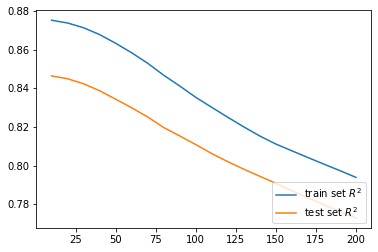

In [183]:
#train/test check for 33 features 
X_train, X_test, Y_train, Y_test = train_test_split(trainX_alpha20, trainY, test_size=0.3, random_state=10)
lasso_R2_train  = []
lasso_R2_test = []
alphaRange = np.linspace(10,200,20)
for alpha in alphaRange:
    lasso.set_params(alpha=alpha,normalize=True)  
    lasso.fit(X_train,Y_train)
    lasso_R2_train.append(lasso.score(X_train,Y_train)) 
    lasso_R2_test.append(lasso.score(X_test,Y_test))
    
plt.plot(alphaRange, lasso_R2_train, label=r'train set $R^2$')
plt.plot(alphaRange, lasso_R2_test, label=r'test set $R^2$')
plt.legend(loc=4)